<a href="https://colab.research.google.com/github/assulthoni/DTI-assignment/blob/main/Mall_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation With Clustering

## Import libraries and Get File from Kaggle

In [1]:
import os
import sys

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

import plotly as ply
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [2]:
# upload kaggle.json from your kaggle account
from google.colab import files
kaggle_json_upload = files.upload()

import shutil
# !mkdir /root/.kaggle/
shutil.copy('kaggle(2).json', '/root/.kaggle/kaggle.json')
os.chmod('/root/.kaggle/kaggle.json', 600)
import kaggle

Saving kaggle(2).json to kaggle(2) (1).json


In [3]:
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

customer-segmentation-tutorial-in-python.zip: Skipping, found more recently modified local copy (use --force to force download)


## Read Data

In [4]:
# read data from temporary disk in colab
df_customer = pd.read_csv('/content/customer-segmentation-tutorial-in-python.zip')
df_customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exploratory Data Analysis

In [5]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df_customer.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df_customer.describe(include=['O'])

,Gender
count,200
unique,2
top,Female
freq,112


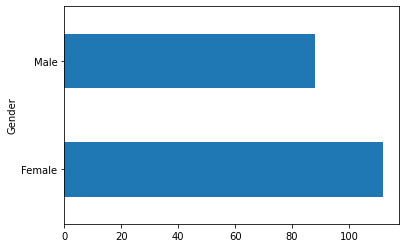

In [8]:
df_customer.groupby(['Gender']).size().plot(kind='barh')

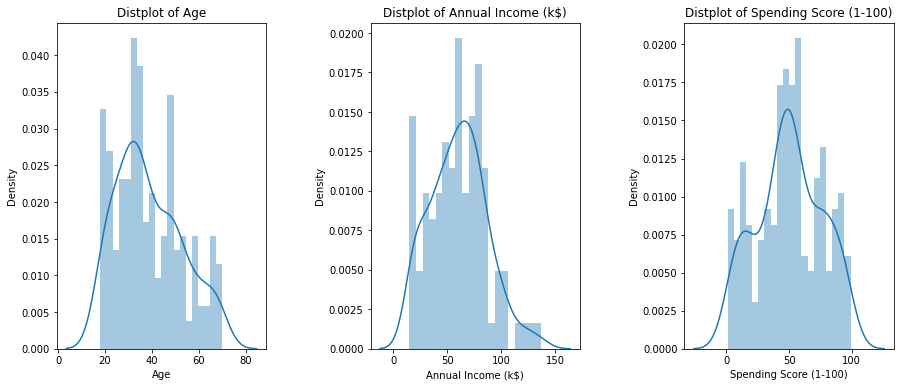

In [9]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df_customer[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

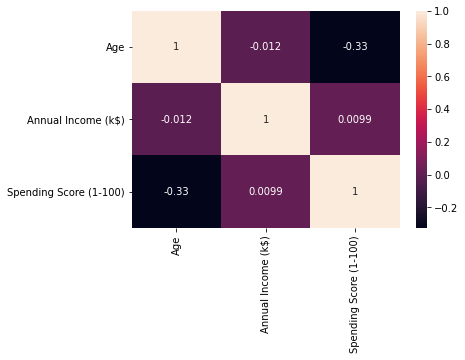

In [10]:
corr = df_customer[['Age',
                   'Annual Income (k$)',
                   'Spending Score (1-100)']].corr()
sns.heatmap(corr, annot=True)

**Apa yang dapat diambil?**


1.   Tidak Ada missing value
2.   Terdapat 1 variable category dan 3 variable numeric
3.   3 Variable Numeric berdistribusi normal
4.   Variable category pada data dominan ke Female (imbalance), maka saya tidak memasukkan ke cluster


## Preprocessing

In [11]:
df_cluster = df_customer.drop(['CustomerID', 'Gender'], axis=1)
df_cluster.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [12]:
scaler = StandardScaler()
df_cluster = scaler.fit_transform(df_cluster)

## Choose Best K for KMeans

In [13]:
within_sum_squares = []
for i in range(1,20):
  kmeans = KMeans(n_clusters=i, 
                  init='k-means++',
                  random_state=42)
  kmeans.fit(df_cluster)
  within_sum_squares.append(kmeans.inertia_)

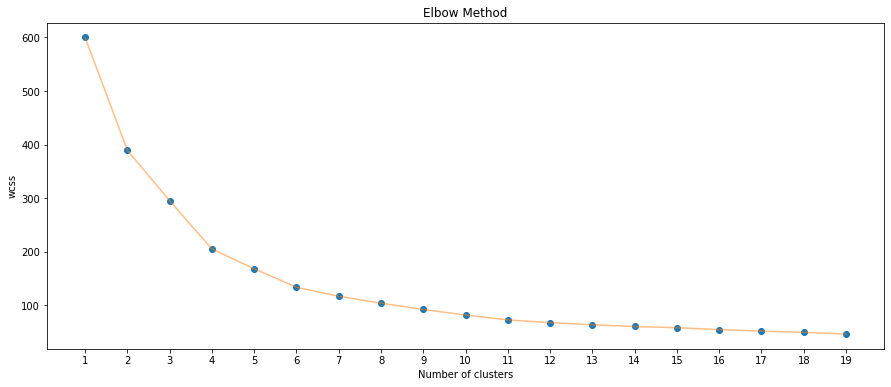

In [14]:
# Visualize 
plt.figure(figsize = (15 ,6))
plt.plot(np.arange(1,20), within_sum_squares, 'o')
plt.plot(np.arange(1,20), within_sum_squares , '-' , alpha = 0.5)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.xticks(np.arange(1,20))
plt.show()

In [15]:
km_scores= []
km_silhouette = []
vmeasure_score =[]
db_score = []
for i in range(2,20):
    km = KMeans(n_clusters=i, random_state=42).fit(df_cluster)
    preds = km.predict(df_cluster)
    
    print("Score for number of cluster(s) {}: {}".format(i,km.score(df_cluster)))
    km_scores.append(-km.score(df_cluster))
    
    silhouette = silhouette_score(df_cluster,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    
    db = davies_bouldin_score(df_cluster,preds)
    db_score.append(db)
    print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))
    print("-"*100)

Score for number of cluster(s) 2: -389.3861889564372
Silhouette score for number of cluster(s) 2: 0.33547192894004574
Davies Bouldin score for number of cluster(s) 2: 1.2606822880201847
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 3: -295.21224615554877
Silhouette score for number of cluster(s) 3: 0.357793388710272
Davies Bouldin score for number of cluster(s) 3: 1.0502701396492662
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 4: -205.2251474767592
Silhouette score for number of cluster(s) 4: 0.4039582785148566
Davies Bouldin score for number of cluster(s) 4: 0.9307956868103671
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 5: -168.24758017556837
Silhouette score for number of cluster(s) 5: 0.41664341513732767
Davies Bouldin score f

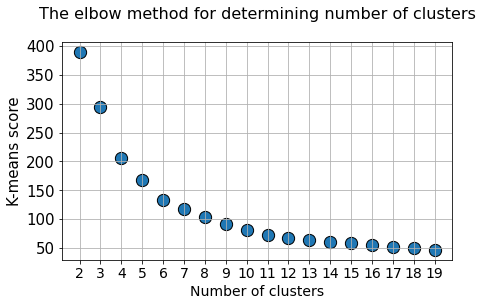

In [16]:
plt.figure(figsize=(7,4))
plt.title("The elbow method for determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,20)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,20)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

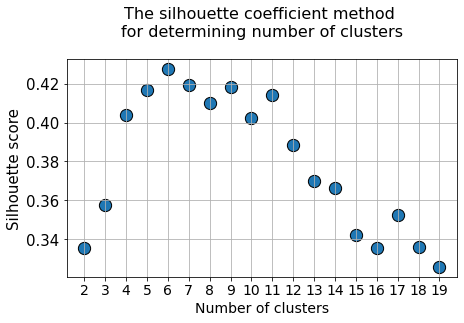

In [17]:
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,20)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,20)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

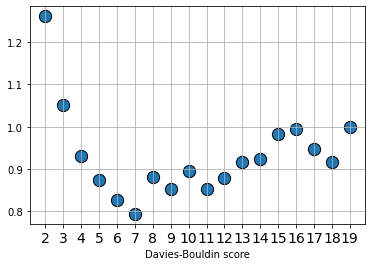

In [18]:
plt.scatter(x=[i for i in range(2,20)],y=db_score,s=150,edgecolor='k')
plt.grid(True)
plt.xticks([i for i in range(2,20)],fontsize=14)
plt.xlabel("Davies-Bouldin score")
plt.show()

Summary of 3 metrics :

1.   Elbow method : Best K (candidates) = [6,7,8]

Validate in other metrics:

2.   Silhouette Coeff : Best K (Rank) = [6,8,7]
3.   Davies Bouldin Index : Best K (Rank) = [8,7,6]

So, i choose 6 for number clusters in KMeans

## Fit cluster to Data

In [19]:
kmeans_sixth = KMeans(n_clusters=6)

cluster = kmeans_sixth.fit_predict(df_cluster)
df_customer['cluster'] = cluster

In [25]:
# save file to consistency of cluster point
df_customer.to_csv('customer with segment.csv', index=False)

# read to interpret
df_customer = pd.read_csv('customer with segment.csv')

## 3D Plot to interpret

In [20]:
trace1 = go.Scatter3d(
    x= df_customer['Age'],
    y= df_customer['Spending Score (1-100)'],
    z= df_customer['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df_customer['cluster'], 
        size= 15,
        line=dict(
            color= df_customer['cluster'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
ply.offline.iplot(fig)

In [23]:
for i in range(0,6):
  display(df_customer.loc[df_customer.cluster == i].sample(3))

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
146,147,Male,48,77,36,0
144,145,Male,25,77,12,0
154,155,Female,47,78,16,0


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
99,100,Male,20,61,49,1
111,112,Female,19,63,54,1
49,50,Female,31,40,42,1


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
60,61,Male,70,46,56,2
96,97,Female,47,60,47,2
46,47,Female,50,40,55,2


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
177,178,Male,27,88,69,3
191,192,Female,32,103,69,3
185,186,Male,30,99,97,3


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
39,40,Female,20,37,75,4
17,18,Male,20,21,66,4
41,42,Male,24,38,92,4


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
18,19,Male,52,23,29,5
36,37,Female,42,34,17,5
20,21,Male,35,24,35,5


## Cluster interpretation:


1.   Cluster no-0 (blue) : Big Income but less Spending with any age
2.   Cluster no-1 (purple) : Average Income and Average spending with young age
3.   Cluster no-2 (pink) : Average Income and Average Spending with old age
4.   Cluster no-3 (tomato) : Big Income and big spending with half old age
5.   Cluster no-4  (orange) : Less Income and Big spending with young age
6.   Cluster no-5 (yellow) : Less Income and Less Spending with half old age

